# Forming Queries

Get familiar with the tools available for querying the database.


We have two options, `from_filter` and `from_area`

In [3]:
from snowexsql.api import LayerMeasurements
from datetime import datetime 

# Find some density pit measurements at the Boise site in december 2019.
df = LayerMeasurements.from_filter(
    type="density",
    site_name="Boise River Basin",
    date_less_equal=datetime(2020, 1, 1),
    date_greater_equal=datetime(2019, 12, 1),
    limit=1000
)


df

,depth,site_id,pit_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,flags,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,41.0,Banner Open,IDBRBO_20191218_1424,31.0,None,None,None,None,268.0,AD,...,2019-12-18,2022-06-30 22:41:24.610808+00:00,None,22602,None,2022-06-30,None,density,None,None
1,31.0,Banner Open,IDBRBO_20191218_1424,21.0,None,None,None,None,377.0,AD,...,2019-12-18,2022-06-30 22:41:24.610808+00:00,None,22603,None,2022-06-30,None,density,None,None
2,21.0,Banner Open,IDBRBO_20191218_1424,11.0,None,None,None,None,228.0,AD,...,2019-12-18,2022-06-30 22:41:24.610808+00:00,None,22604,None,2022-06-30,None,density,None,None
3,11.0,Banner Open,IDBRBO_20191218_1424,1.0,None,None,None,None,243.0,AD,...,2019-12-18,2022-06-30 22:41:24.610808+00:00,None,22605,None,2022-06-30,None,density,None,None
4,41.0,Banner Open,IDBRBO_20191218_1424,31.0,None,268.0,None,None,268.0,AD,...,2019-12-18,2022-06-30 22:41:24.702514+00:00,None,22614,None,2022-06-30,None,density,None,None
5,31.0,Banner Open,IDBRBO_20191218_1424,21.0,None,377.0,None,None,377.0,AD,...,2019-12-18,2022-06-30 22:41:24.702514+00:00,None,22615,None,2022-06-30,None,density,None,None
6,21.0,Banner Open,IDBRBO_20191218_1424,11.0,None,228.0,None,None,228.0,AD,...,2019-12-18,2022-06-30 22:41:24.702514+00:00,None,22616,None,2022-06-30,None,density,None,None
7,11.0,Banner Open,IDBRBO_20191218_1424,1.0,None,243.0,None,None,243.0,AD,...,2019-12-18,2022-06-30 22:41:24.702514+00:00,None,22617,None,2022-06-30,None,density,None,None
8,47.0,Banner Snotel,IDBRBS_20191218_1000,37.0,None,127.0,131.0,None,129.0,AD,...,2019-12-18,2022-06-30 22:41:28.401134+00:00,None,23406,None,2022-06-30,None,density,None,None
9,37.0,Banner Snotel,IDBRBS_20191218_1000,27.0,None,173.0,161.0,None,167.0,AD,...,2019-12-18,2022-06-30 22:41:28.401134+00:00,None,23407,None,2022-06-30,None,density,None,None


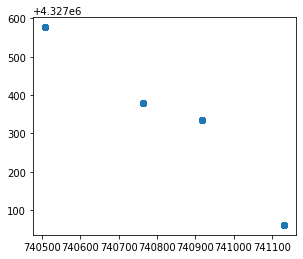

In [23]:
from snowexsql.api import LayerMeasurements
from datetime import datetime 
from shapely.geometry import Point 

# Find some density pit measurements at the Boise site in december 2019.
df = LayerMeasurements.from_area(pt=Point(740820.624625,4.327326e+06), crs=26912, buffer=500,
    type='specific_surface_area')


df.plot()

This feels soooo *limited* :)

### How do I know what to filter on?
We got a tool for that!

In [44]:
from snowexsql.api import PointMeasurements

measurements = PointMeasurements()
# Get the unique data names/types in the table
results = measurements.all_types
print('Available types = {}'.format(', '.join([str(r[0]) for r in results])))

# Get the unique instrument in the table
results = measurements.all_instruments
print('\nAvailable Instruments = {}'.format(', '.join([str(r[0]) for r in results])))

# Get the unique dates in the table
results = measurements.all_dates
print('\nAvailable Dates = {}'.format(', '.join([str(r[0]) for r in results])))

# Get the unique site names in the table
results = measurements.all_site_names
print('\nAvailable sites = {}'.format(', '.join([str(r[0]) for r in results])))

Available types = swe, depth, two_way_travel

Available Instruments = None, Mala 1600 MHz GPR, Mala 800 MHz GPR, pulse EKKO Pro multi-polarization 1 GHz GPR, pit ruler, mesa, magnaprobe, camera

Available Dates = 2020-05-28, 2020-01-09, 2020-05-23, 2020-01-04, 2019-11-29, 2019-10-20, 2019-11-30, 2020-04-17, 2020-02-19, 2020-02-26, 2020-02-03, 2020-05-05, 2019-10-05, 2019-12-29, 2020-06-02, 2019-10-28, 2020-01-30, 2020-05-22, 2020-03-09, 2019-12-09, 2019-12-28, 2020-02-24, 2020-03-17, 2020-04-01, 2020-05-14, 2019-10-29, 2019-10-14, 2019-10-02, 2020-01-31, 2020-04-18, 2020-04-29, 2020-04-26, 2019-10-12, 2020-02-23, 2020-01-22, 2020-01-01, 2019-11-21, 2020-05-10, 2020-02-12, 2020-05-06, 2019-11-19, 2019-10-25, 2019-11-02, 2020-02-08, 2020-04-14, 2020-04-02, 2019-11-16, 2020-04-07, 2019-12-27, 2019-10-01, 2020-04-16, 2020-06-08, 2019-12-13, 2019-10-17, 2019-10-22, 2020-04-21, 2020-01-03, 2019-12-12, 2019-12-08, 2020-01-25, 2020-02-29, 2019-11-24, 2019-10-18, 2020-05-09, 2020-03-22, 2019-11

## Recap 
You just explored using the session object to form queries and compounding filters results with it

**You should know:**
* How to build queries using filtering
* How to isolate column data 
* Determine what values to filter on

If you don't feel comfortable with these, you are probably not alone, let's discuss it!